# Análise Exploratória de Dados dos Filmes Star Wars
**Objetivo**: Explorar os dados relacionados aos filmes da franquia Star Wars, enriquecidos pela API OMDb, para gerar insights de enredo.

**Ferramentas**: Python, SQLAlchemy, Pandas, Numpy Matplotlib, Seaborn, MySQL.


In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sqlalchemy import create_engine

# Configuração para visualizações
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# Configuração do banco de dados MySQL
DB_USERNAME = "root"
DB_PASSWORD = "123456"
DB_HOST = "localhost"
DB_PORT = "3306"
DB_NAME = "star_wars"

# Criação da engine do SQLAlchemy
engine = create_engine(f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Testando a conexão
try:
    with engine.connect() as conn:
        print("Conexão com o banco de dados bem-sucedida!")
except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")


Conexão com o banco de dados bem-sucedida!


In [21]:
# Consultando os dados da tabela de filmes
query = """
SELECT 
    planets.name, 
    COUNT(films.title) as qtd_films
FROM planets 
LEFT JOIN 
planets_films on planets.id = planets_films.planet_id
LEFT JOIN
films
ON
films.id = planets_films.film_id
GROUP BY planets.name

"""
df_films_planets = pd.read_sql(query, con=engine)
df_films_planets = df_films_planets.loc[df_films_planets['qtd_films'] > 0]
df_films_planets.sort_values(by='qtd_films', ascending=False, inplace=True)
df_films_planets.reset_index(inplace=True)


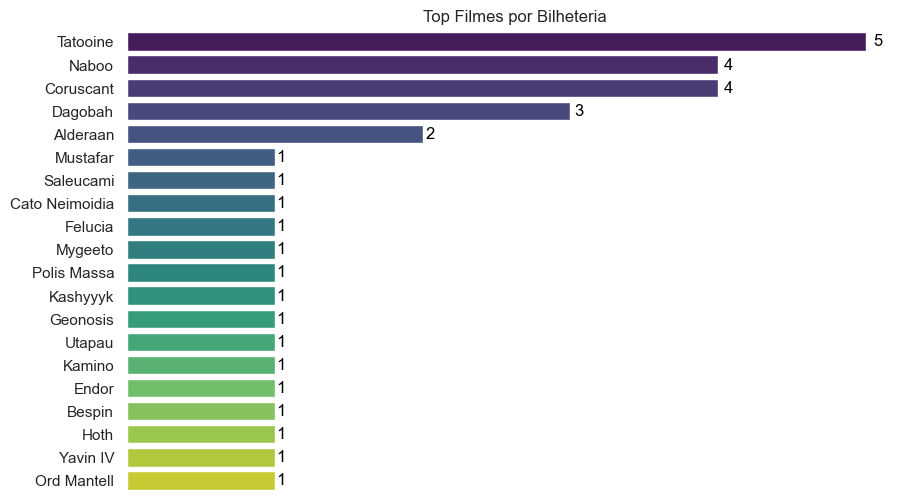

In [ ]:
fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="qtd_films", y="name", data=df_films_planets, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    qtd_filmes = df_films_planets['qtd_films'][index]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{qtd_filmes}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )

plt.title("Planetas que mais apareceram em filmes")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()


In [30]:
# Consultando os dados da tabela de filmes
query = """
SELECT 
    people.name, 
    COUNT(starships.name) as qtd_starships
FROM people 
LEFT JOIN 
starships_people on people.id = starships_people.person_id
LEFT JOIN
starships
ON
starships.id = starships_people.person_id
GROUP BY people.name
ORDER BY qtd_starships DESC

"""
df_people_starships = pd.read_sql(query, con=engine)
df_people_starships = df_people_starships.loc[df_people_starships['qtd_starships'] > 0]
df_people_starships.sort_values(by='qtd_starships', ascending=False, inplace=True)
df_people_starships.reset_index(inplace=True)


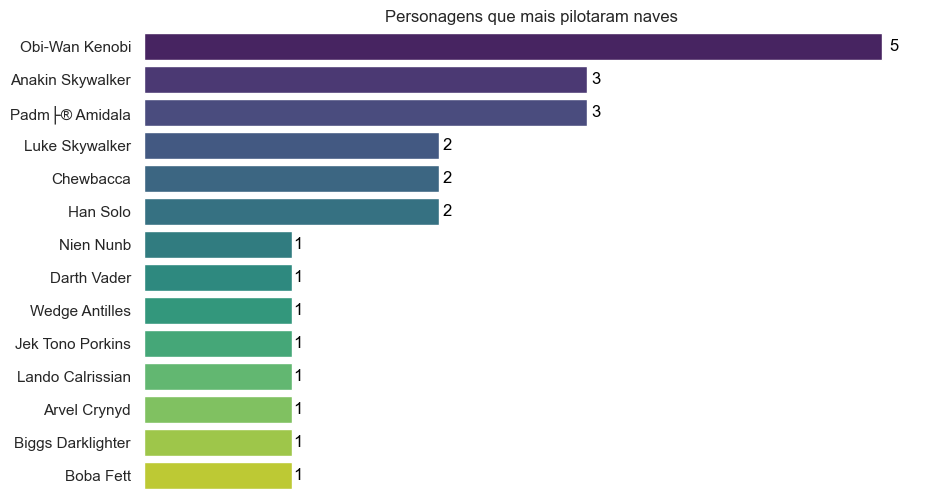

In [33]:
fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="qtd_starships", y="name", data=df_people_starships, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    qtd_filmes = df_people_starships['qtd_starships'][index]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{qtd_filmes}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )

plt.title("Personagens que mais pilotaram naves")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()


In [41]:
query = """
SELECT name, max_atmosphering_speed 
FROM starships 
ORDER BY CAST(max_atmosphering_speed AS UNSIGNED) DESC 
LIMIT 5;
"""
df_starship = pd.read_sql(query, con=engine)


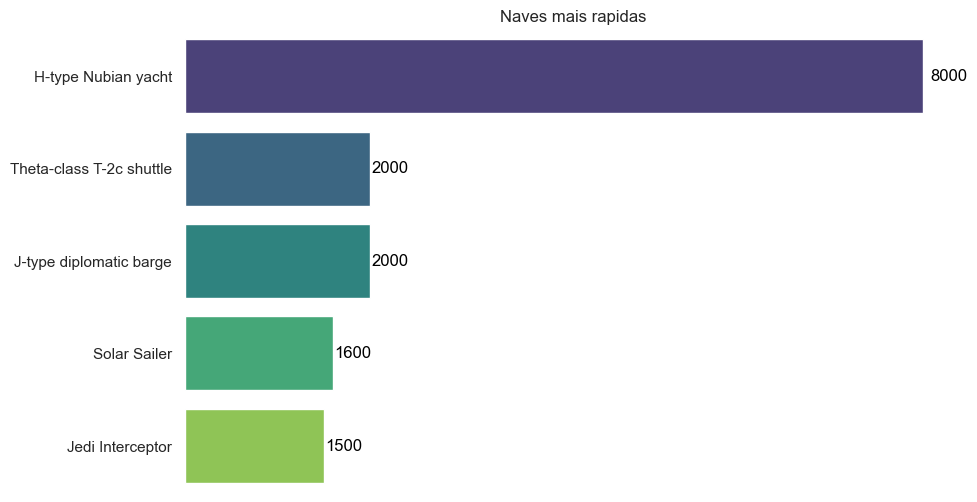

In [43]:
fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="max_atmosphering_speed", y="name", data=df_starship, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    qtd_filmes = df_starship['max_atmosphering_speed'][index]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{qtd_filmes}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )

plt.title("Naves mais rapidas")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()


In [36]:
# Consultando os dados da tabela de filmes
query = """
SELECT 
    people.name, 
    COUNT(vehicles.name) as qtd_vehicles
FROM people 
LEFT JOIN 
vehicles_people on people.id = vehicles_people.person_id
LEFT JOIN
vehicles
ON
vehicles.id = vehicles_people.vehicle_id
GROUP BY people.name
ORDER BY qtd_vehicles DESC

"""
df_people_vehicles = pd.read_sql(query, con=engine)
df_people_vehicles = df_people_vehicles.loc[df_people_vehicles['qtd_vehicles'] > 0]
df_people_vehicles.sort_values(by='qtd_vehicles', ascending=False, inplace=True)
df_people_vehicles.reset_index(inplace=True)


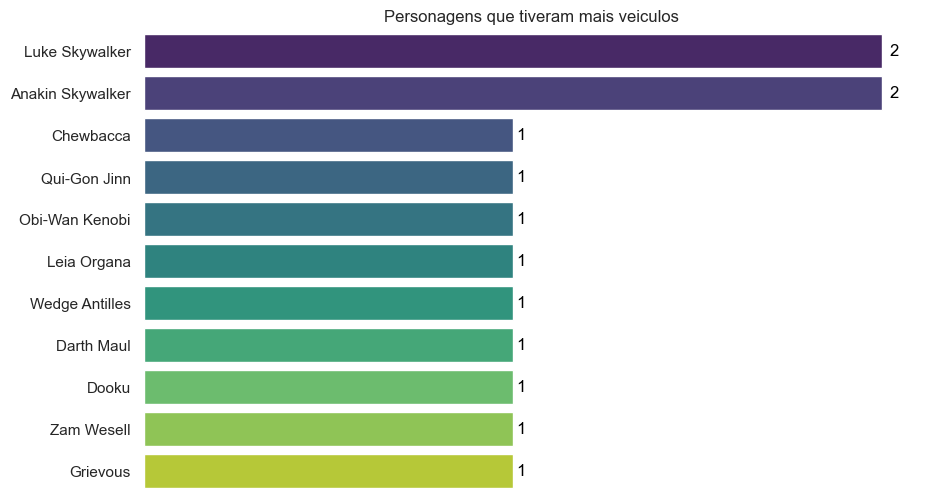

In [38]:
fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="qtd_vehicles", y="name", data=df_people_vehicles, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    qtd_filmes = df_people_vehicles['qtd_vehicles'][index]
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{qtd_filmes}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )

plt.title("Personagens que tiveram mais veiculos")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()
